#Load Dataset


In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os


Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Final Project Combined Dataset/combined_benign_dos_dataset.csv'
df = pd.read_csv(file_path)


In [3]:
df

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
0,172.16.0.1_51684_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:34.450759,172.16.0.1,51684,192.168.10.50,80,TCP,9.157589,14,8,...,0.216681,0.426791,1.070206,0.000041,1.083407,4.000000,3.0,10.000000,10.000000,DDoS_LOIT
1,172.16.0.1_51685_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:37.458009,172.16.0.1,51685,192.168.10.50,80,TCP,6.150288,14,8,...,0.081214,0.162075,0.405363,0.000003,0.406071,8.000000,6.0,20.000000,20.000000,DDoS_LOIT
2,172.16.0.1_51686_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.197578,172.16.0.1,51686,192.168.10.50,80,TCP,8.410717,14,8,...,0.128499,0.256598,0.641694,0.000003,0.642493,8.000000,6.0,20.000000,20.000000,DDoS_LOIT
3,172.16.0.1_51688_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.851361,172.16.0.1,51688,192.168.10.50,80,TCP,7.757913,13,8,...,0.170631,0.294910,0.681429,0.000004,0.682523,8.000000,5.0,20.000000,20.000000,DDoS_LOIT
4,172.16.0.1_51687_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.546062,172.16.0.1,51687,192.168.10.50,80,TCP,8.063397,14,8,...,0.061228,0.122073,0.305373,0.000003,0.306140,8.000000,6.0,20.000000,20.000000,DDoS_LOIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094477,192.168.10.16_59990_172.217.12.164_443_TCP_201...,2017-07-06 10:49:02.418591,192.168.10.16,59990,172.217.12.164,443,TCP,0.000000,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Benign
1094478,192.168.10.16_56014_172.217.11.2_443_TCP_2017-...,2017-07-06 10:49:02.419473,192.168.10.16,56014,172.217.11.2,443,TCP,0.000000,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Benign
1094479,192.168.10.9_137_192.168.10.255_137_UDP_2017-0...,2017-07-06 10:51:29.334491,192.168.10.9,137,192.168.10.255,137,UDP,3.770219,78,78,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Benign
1094480,192.168.10.5_59502_192.168.10.3_53_UDP_2017-07...,2017-07-06 10:49:02.474736,192.168.10.5,59502,192.168.10.3,53,UDP,0.076813,6,4,...,0.000003,0.000000,0.000003,0.000003,0.000003,0.000000,0.0,0.000000,0.000000,Benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094482 entries, 0 to 1094481
Columns: 122 entries, flow_id to label
dtypes: float64(61), int64(55), object(6)
memory usage: 1018.7+ MB


In [5]:
df.describe()

,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,fwd_packets_IAT_total,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes
count,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,...,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06,1.094482e+06
mean,4.261716e+04,6.606342e+03,1.365891e+01,1.895946e+01,8.970783e+00,9.988676e+00,1.669156e+04,4.143683e+02,1.627720e+04,1.812712e+03,...,3.858809e+08,1.967148e+08,1.153072e+00,1.967148e+08,1.967148e+08,1.967148e+08,2.167661e+00,2.215915e+00,9.276655e+01,9.276655e+01
std,2.065463e+04,1.696182e+04,1.157385e+02,3.805641e+03,1.630148e+03,2.175741e+03,4.831541e+06,4.334416e+03,4.831175e+06,2.869265e+03,...,6.554441e+08,5.061749e+08,7.069839e+00,5.061749e+08,5.061749e+08,5.061749e+08,3.687706e+02,4.849341e+02,1.152695e+03,1.152695e+03
min,2.100000e+01,2.100000e+01,-9.536743e-07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.500000e-07,0.000000e+00,-9.536743e-07,-1.215935e-05,-9.536743e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.608200e+04,8.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.053116e-06,3.100000e-06,0.000000e+00,3.099442e-06,1.192093e-06,3.099442e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.069000e+04,8.000000e+01,3.112698e-02,4.000000e+00,2.000000e+00,2.000000e+00,2.860000e+02,5.800000e+01,1.890000e+02,1.120000e+02,...,9.315854e-01,1.193309e-02,0.000000e+00,3.014302e-02,1.502037e-05,4.265404e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.767600e+04,4.430000e+02,8.474172e-01,1.300000e+01,7.000000e+00,6.000000e+00,1.161500e+04,3.340000e+02,1.159500e+04,2.920000e+03,...,1.499085e+09,7.043521e-01,5.254772e-02,4.999901e+00,2.248287e-04,5.171185e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553300e+04,2.891887e+04,2.450874e+06,1.044522e+06,1.407985e+06,3.068159e+09,2.361120e+06,3.067935e+09,2.336000e+04,...,1.499455e+09,1.499353e+09,2.650999e+02,1.499353e+09,1.499353e+09,1.499353e+09,3.481740e+05,4.632523e+05,5.915050e+05,5.915050e+05


In [6]:
with pd.option_context('display.max_rows', None):
    display(df.isnull().sum())

,0
flow_id,0
timestamp,0
src_ip,0
src_port,0
dst_ip,0
dst_port,0
protocol,0
duration,0
packets_count,0
fwd_packets_count,0


In [7]:
print(df['label'].value_counts())


label
Benign              629108
DoS_Hulk            349240
DDoS_LOIT            95733
DoS_GoldenEye         8364
DoS_Slowhttptest      6860
DoS_Slowloris         5177
Name: count, dtype: int64


#Preprocessing

In [8]:
# Map everything that is NOT benign to "attack" (1); benign → 0
df['attack_flag'] = np.where(df['label'] == 'Benign', 0, 1)
print(df['attack_flag'].value_counts())


attack_flag
0    629108
1    465374
Name: count, dtype: int64


In [9]:
df.head()

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label,attack_flag
0,172.16.0.1_51684_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:34.450759,172.16.0.1,51684,192.168.10.50,80,TCP,9.157589,14,8,...,0.426791,1.070206,0.000041,1.083407,4.0,3.0,10.0,10.0,DDoS_LOIT,1
1,172.16.0.1_51685_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:37.458009,172.16.0.1,51685,192.168.10.50,80,TCP,6.150288,14,8,...,0.162075,0.405363,0.000003,0.406071,8.0,6.0,20.0,20.0,DDoS_LOIT,1
2,172.16.0.1_51686_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.197578,172.16.0.1,51686,192.168.10.50,80,TCP,8.410717,14,8,...,0.256598,0.641694,0.000003,0.642493,8.0,6.0,20.0,20.0,DDoS_LOIT,1
3,172.16.0.1_51688_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.851361,172.16.0.1,51688,192.168.10.50,80,TCP,7.757913,13,8,...,0.294910,0.681429,0.000004,0.682523,8.0,5.0,20.0,20.0,DDoS_LOIT,1
4,172.16.0.1_51687_192.168.10.50_80_TCP_2017-07-...,2017-07-07 14:56:35.546062,172.16.0.1,51687,192.168.10.50,80,TCP,8.063397,14,8,...,0.122073,0.305373,0.000003,0.306140,8.0,6.0,20.0,20.0,DDoS_LOIT,1


In [10]:
# columns to delete
id_cols = ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'label', 'src_port', 'dst_port', 'protocol', 'attack_flag']

y = df['attack_flag']
X = df.drop(columns=id_cols)
print("Initial features:", X.shape[1])


Initial features: 114


In [11]:
X

,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,payload_bytes_min,payload_bytes_mean,...,fwd_packets_IAT_total,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes
0,9.157589,14,8,6,11615,20,11595,4380,0,829.642857,...,9.157589e+00,0.216681,0.426791,1.070206,0.000041,1.083407,4.000000,3.0,10.000000,10.000000
1,6.150288,14,8,6,11615,20,11595,5840,0,829.642857,...,6.150288e+00,0.081214,0.162075,0.405363,0.000003,0.406071,8.000000,6.0,20.000000,20.000000
2,8.410717,14,8,6,11615,20,11595,5840,0,829.642857,...,8.410717e+00,0.128499,0.256598,0.641694,0.000003,0.642493,8.000000,6.0,20.000000,20.000000
3,7.757913,13,8,5,11615,20,11595,10135,0,893.461538,...,7.757913e+00,0.170631,0.294910,0.681429,0.000004,0.682523,8.000000,5.0,20.000000,20.000000
4,8.063397,14,8,6,11615,20,11595,5840,0,829.642857,...,8.063397e+00,0.061228,0.122073,0.305373,0.000003,0.306140,8.000000,6.0,20.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094477,0.000000,1,1,0,0,0,0,0,0,0.000000,...,1.499353e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1094478,0.000000,1,1,0,0,0,0,0,0,0.000000,...,1.499353e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1094479,3.770219,78,78,0,3900,3900,0,50,50,50.000000,...,3.770219e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1094480,0.076813,6,4,2,404,188,216,108,47,67.333333,...,3.806400e-02,0.000003,0.000000,0.000003,0.000003,0.000003,0.000000,0.0,0.000000,0.000000


In [12]:
from sklearn.feature_selection import VarianceThreshold

var_filter = VarianceThreshold(threshold=0.0)   # drops columns where var == 0
X_var = pd.DataFrame(var_filter.fit_transform(X),
                     columns=X.columns[var_filter.get_support()])

print("After zero-variance filter:", X_var.shape[1])

After zero-variance filter: 111


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rect_corr_heatmap(X, method="pearson", title="Correlation overview (after variance filter)",
                           max_ticks=40, width_per_feat=0.22, height_per_feat=0.12,
                           min_size=(12, 6), max_size=(48, 30), outfile=None, cluster=True):

    Xn = X.select_dtypes(include=[np.number])
    corr = Xn.corr(method=method)

    if cluster:
        try:
            from scipy.cluster.hierarchy import linkage, leaves_list
            Z = linkage(corr.fillna(0), method="average", metric="euclidean")
            order = leaves_list(Z)
            corr = corr.iloc[order, order]
        except Exception:
            pass

    n = corr.shape[0]

    width  = np.clip(width_per_feat * n + 2,  min_size[0], max_size[0])
    height = np.clip(height_per_feat * n + 2, min_size[1], max_size[1])

    fig, ax = plt.subplots(figsize=(width, height), dpi=200)
    hm = sns.heatmap(
        corr, cmap="coolwarm", vmin=-1, vmax=1, center=0,
        square=False, cbar_kws={"shrink": 0.6},
        xticklabels=False, yticklabels=False,
        linewidths=0
    )

    step = max(1, n // max_ticks)
    ax.set_xticks(np.arange(0.5, n, step))
    ax.set_yticks(np.arange(0.5, n, step))
    ax.set_xticklabels(corr.columns[::step], rotation=90, fontsize=6)
    ax.set_yticklabels(corr.index[::step], rotation=0, fontsize=6)

    ax.set_aspect('auto')
    ax.set_title(title)
    plt.tight_layout()
    if outfile:
        plt.savefig(outfile, dpi=300)
    plt.show()



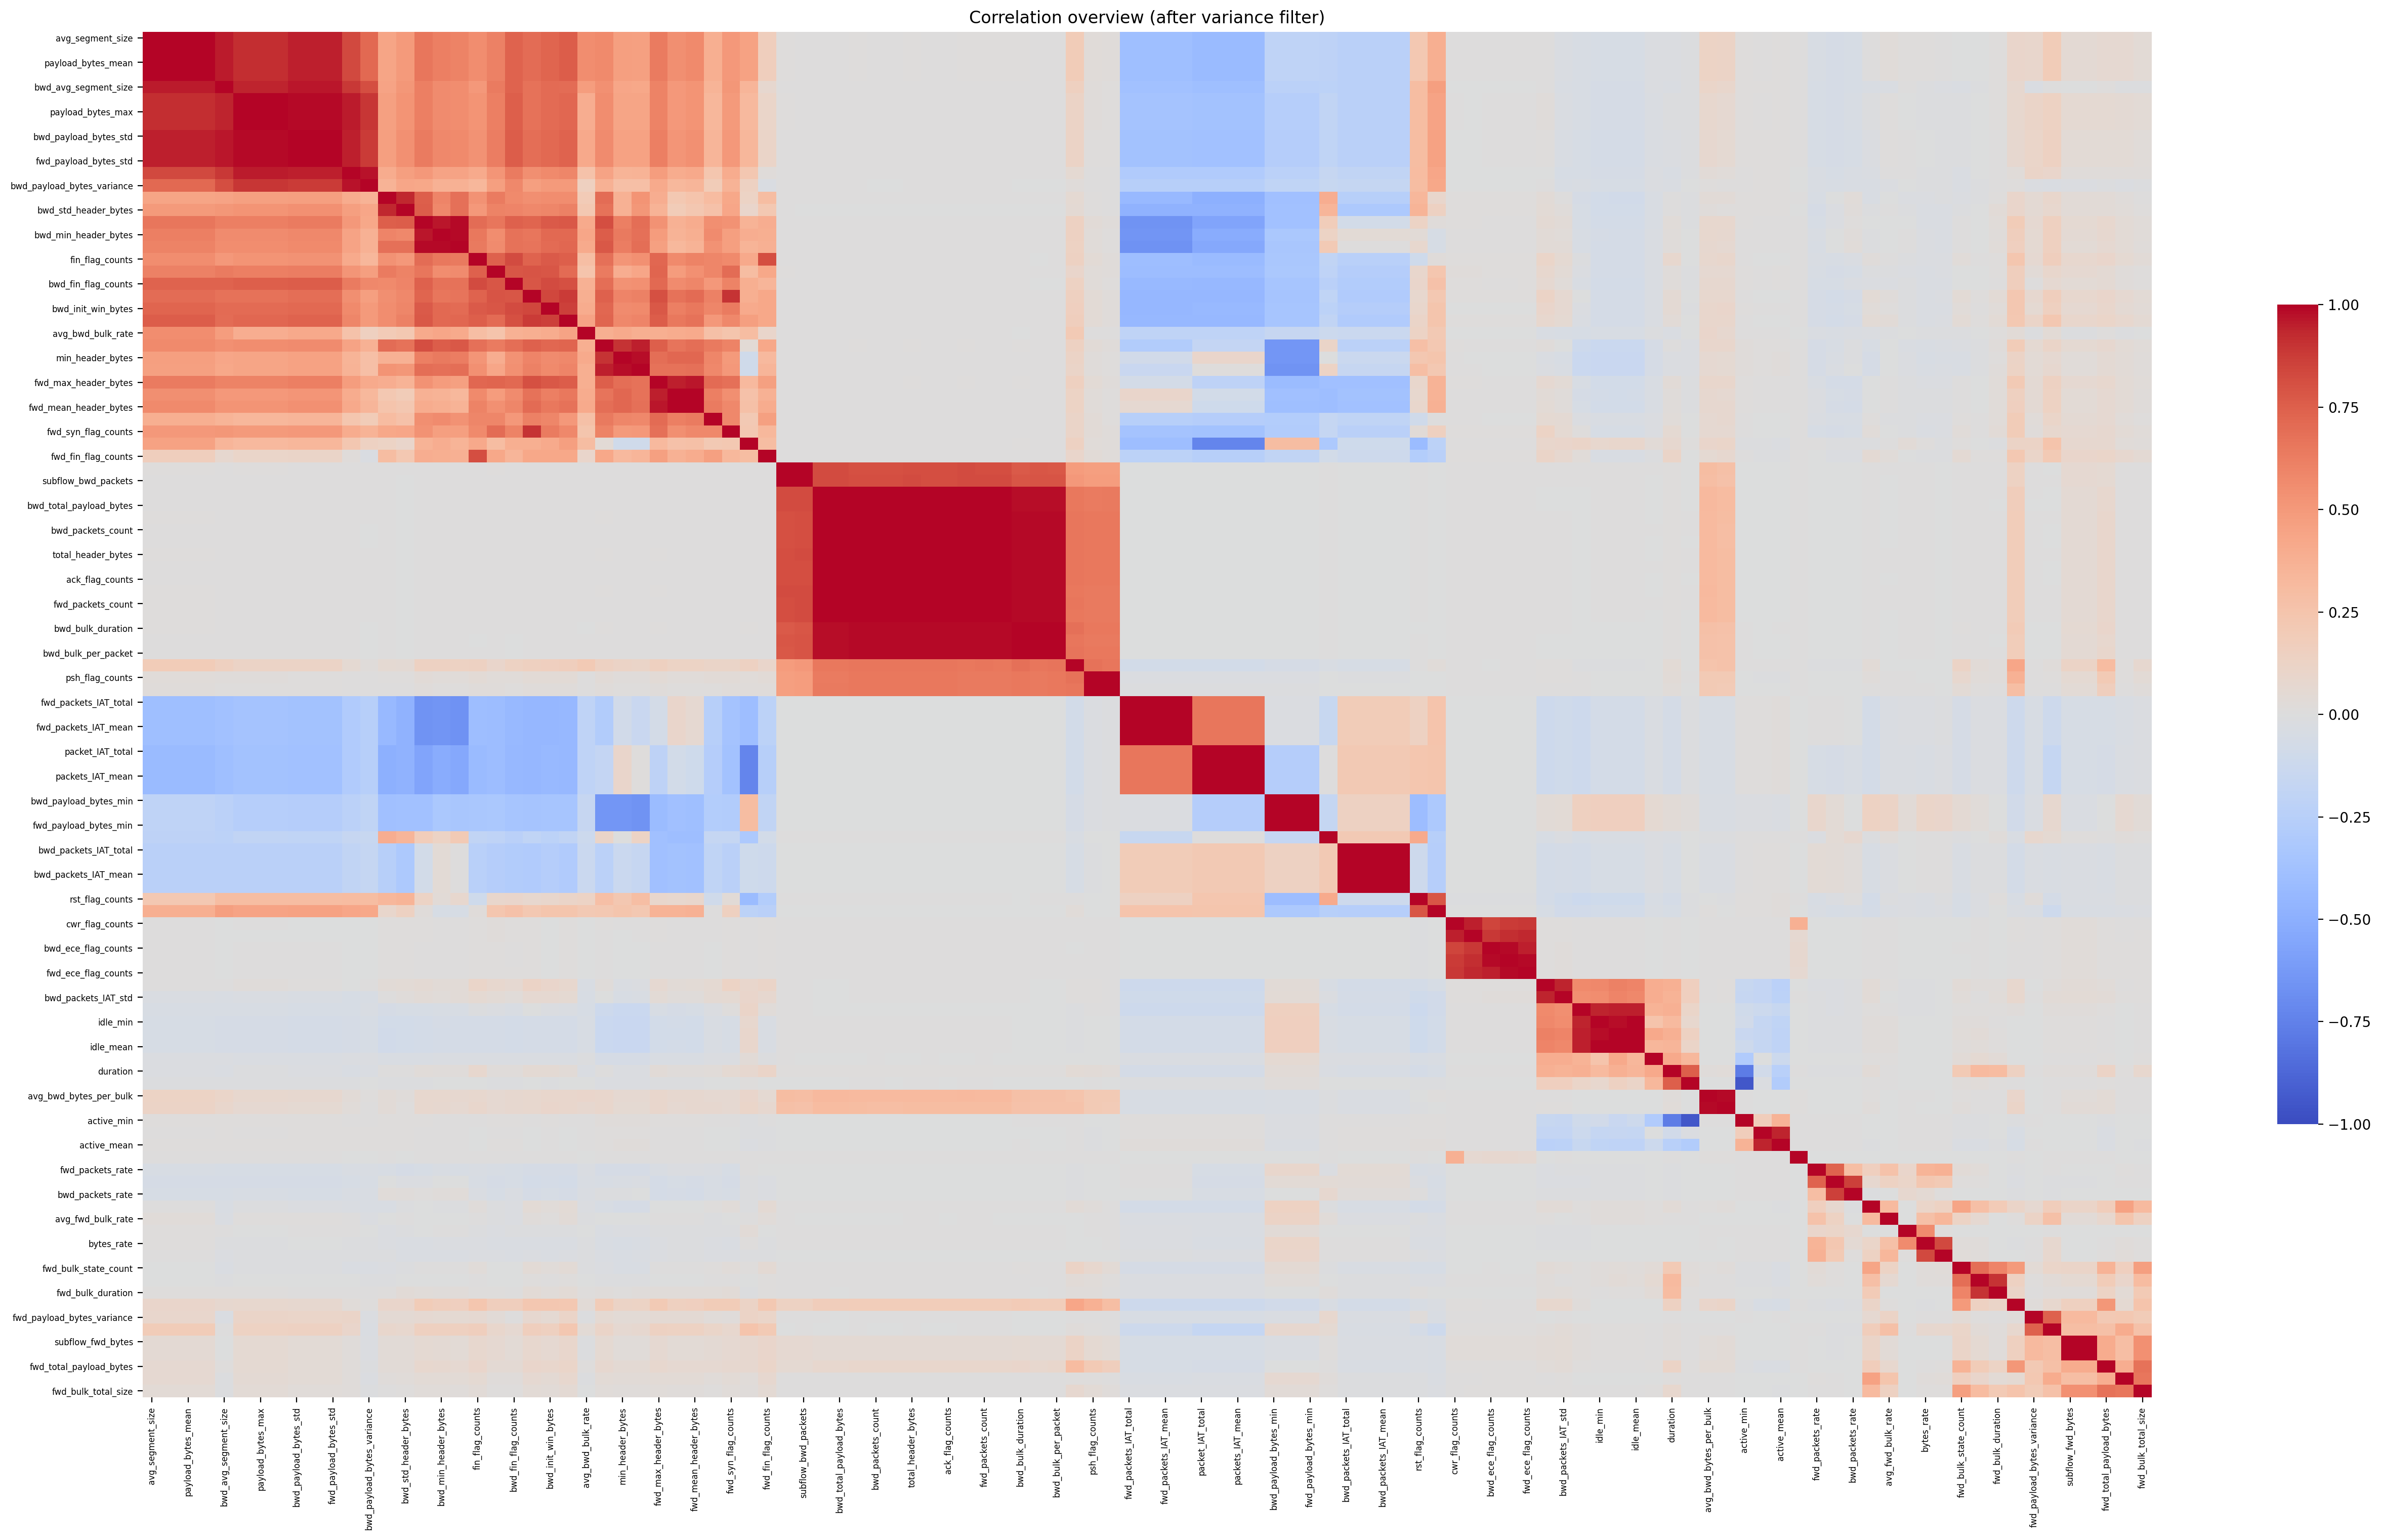

In [14]:
plot_rect_corr_heatmap(X_var, method="pearson", outfile="corr_heatmap_full.png")


In [15]:

def prune_high_corr(X, method="pearson", thresh=0.95, verbose=True):

    Xn = X.select_dtypes(include=[np.number])
    Xn = Xn.loc[:, Xn.std(ddof=0).gt(0)]

    corr = Xn.corr(method=method)

    upper = corr.where(np.triu(np.ones_like(corr, dtype=bool), k=1))
    to_drop = [col for col in upper.columns if upper[col].abs().gt(thresh).any(skipna=True)]

    X_clean = Xn.drop(columns=to_drop, errors="ignore")

    if verbose:
        print(f"Threshold: |ρ| > {thresh}")
        print(f"Dropped {len(to_drop)} columns → final feature count: {X_clean.shape[1]}")
        if to_drop:

            offenders = []
            for c in to_drop:
                s = upper[c].abs().sort_values(ascending=False)
                offenders.append((c, s.index[0], s.iloc[0]))
            offenders = sorted(offenders, key=lambda t: t[2], reverse=True)[:10]
            print("Top offending pairs (kept ←→ dropped, |ρ|):")
            for d, kept, r in offenders:
                print(f"  {kept} ←→ {d}: {r:.3f}")

    return X_clean, to_drop, corr

In [16]:
# 1) Prune highly correlated features
X_clean, dropped_cols, corr_before = prune_high_corr(
    X_var, method="pearson", thresh=0.95, verbose=True
)

Threshold: |ρ| > 0.95
Dropped 48 columns → final feature count: 63
Top offending pairs (kept ←→ dropped, |ρ|):
  bwd_packets_IAT_mean ←→ bwd_packets_IAT_max: 1.000
  fwd_packets_IAT_mean ←→ fwd_packets_IAT_min: 1.000
  bwd_packets_IAT_max ←→ bwd_packets_IAT_total: 1.000
  fwd_packets_IAT_mean ←→ fwd_packets_IAT_max: 1.000
  packets_IAT_mean ←→ packet_IAT_max: 1.000
  packets_IAT_mean ←→ packet_IAT_total: 1.000
  packet_IAT_max ←→ packet_IAT_min: 1.000
  payload_bytes_max ←→ fwd_payload_bytes_max: 1.000
  payload_bytes_min ←→ fwd_payload_bytes_min: 1.000
  payload_bytes_mean ←→ fwd_payload_bytes_mean: 1.000


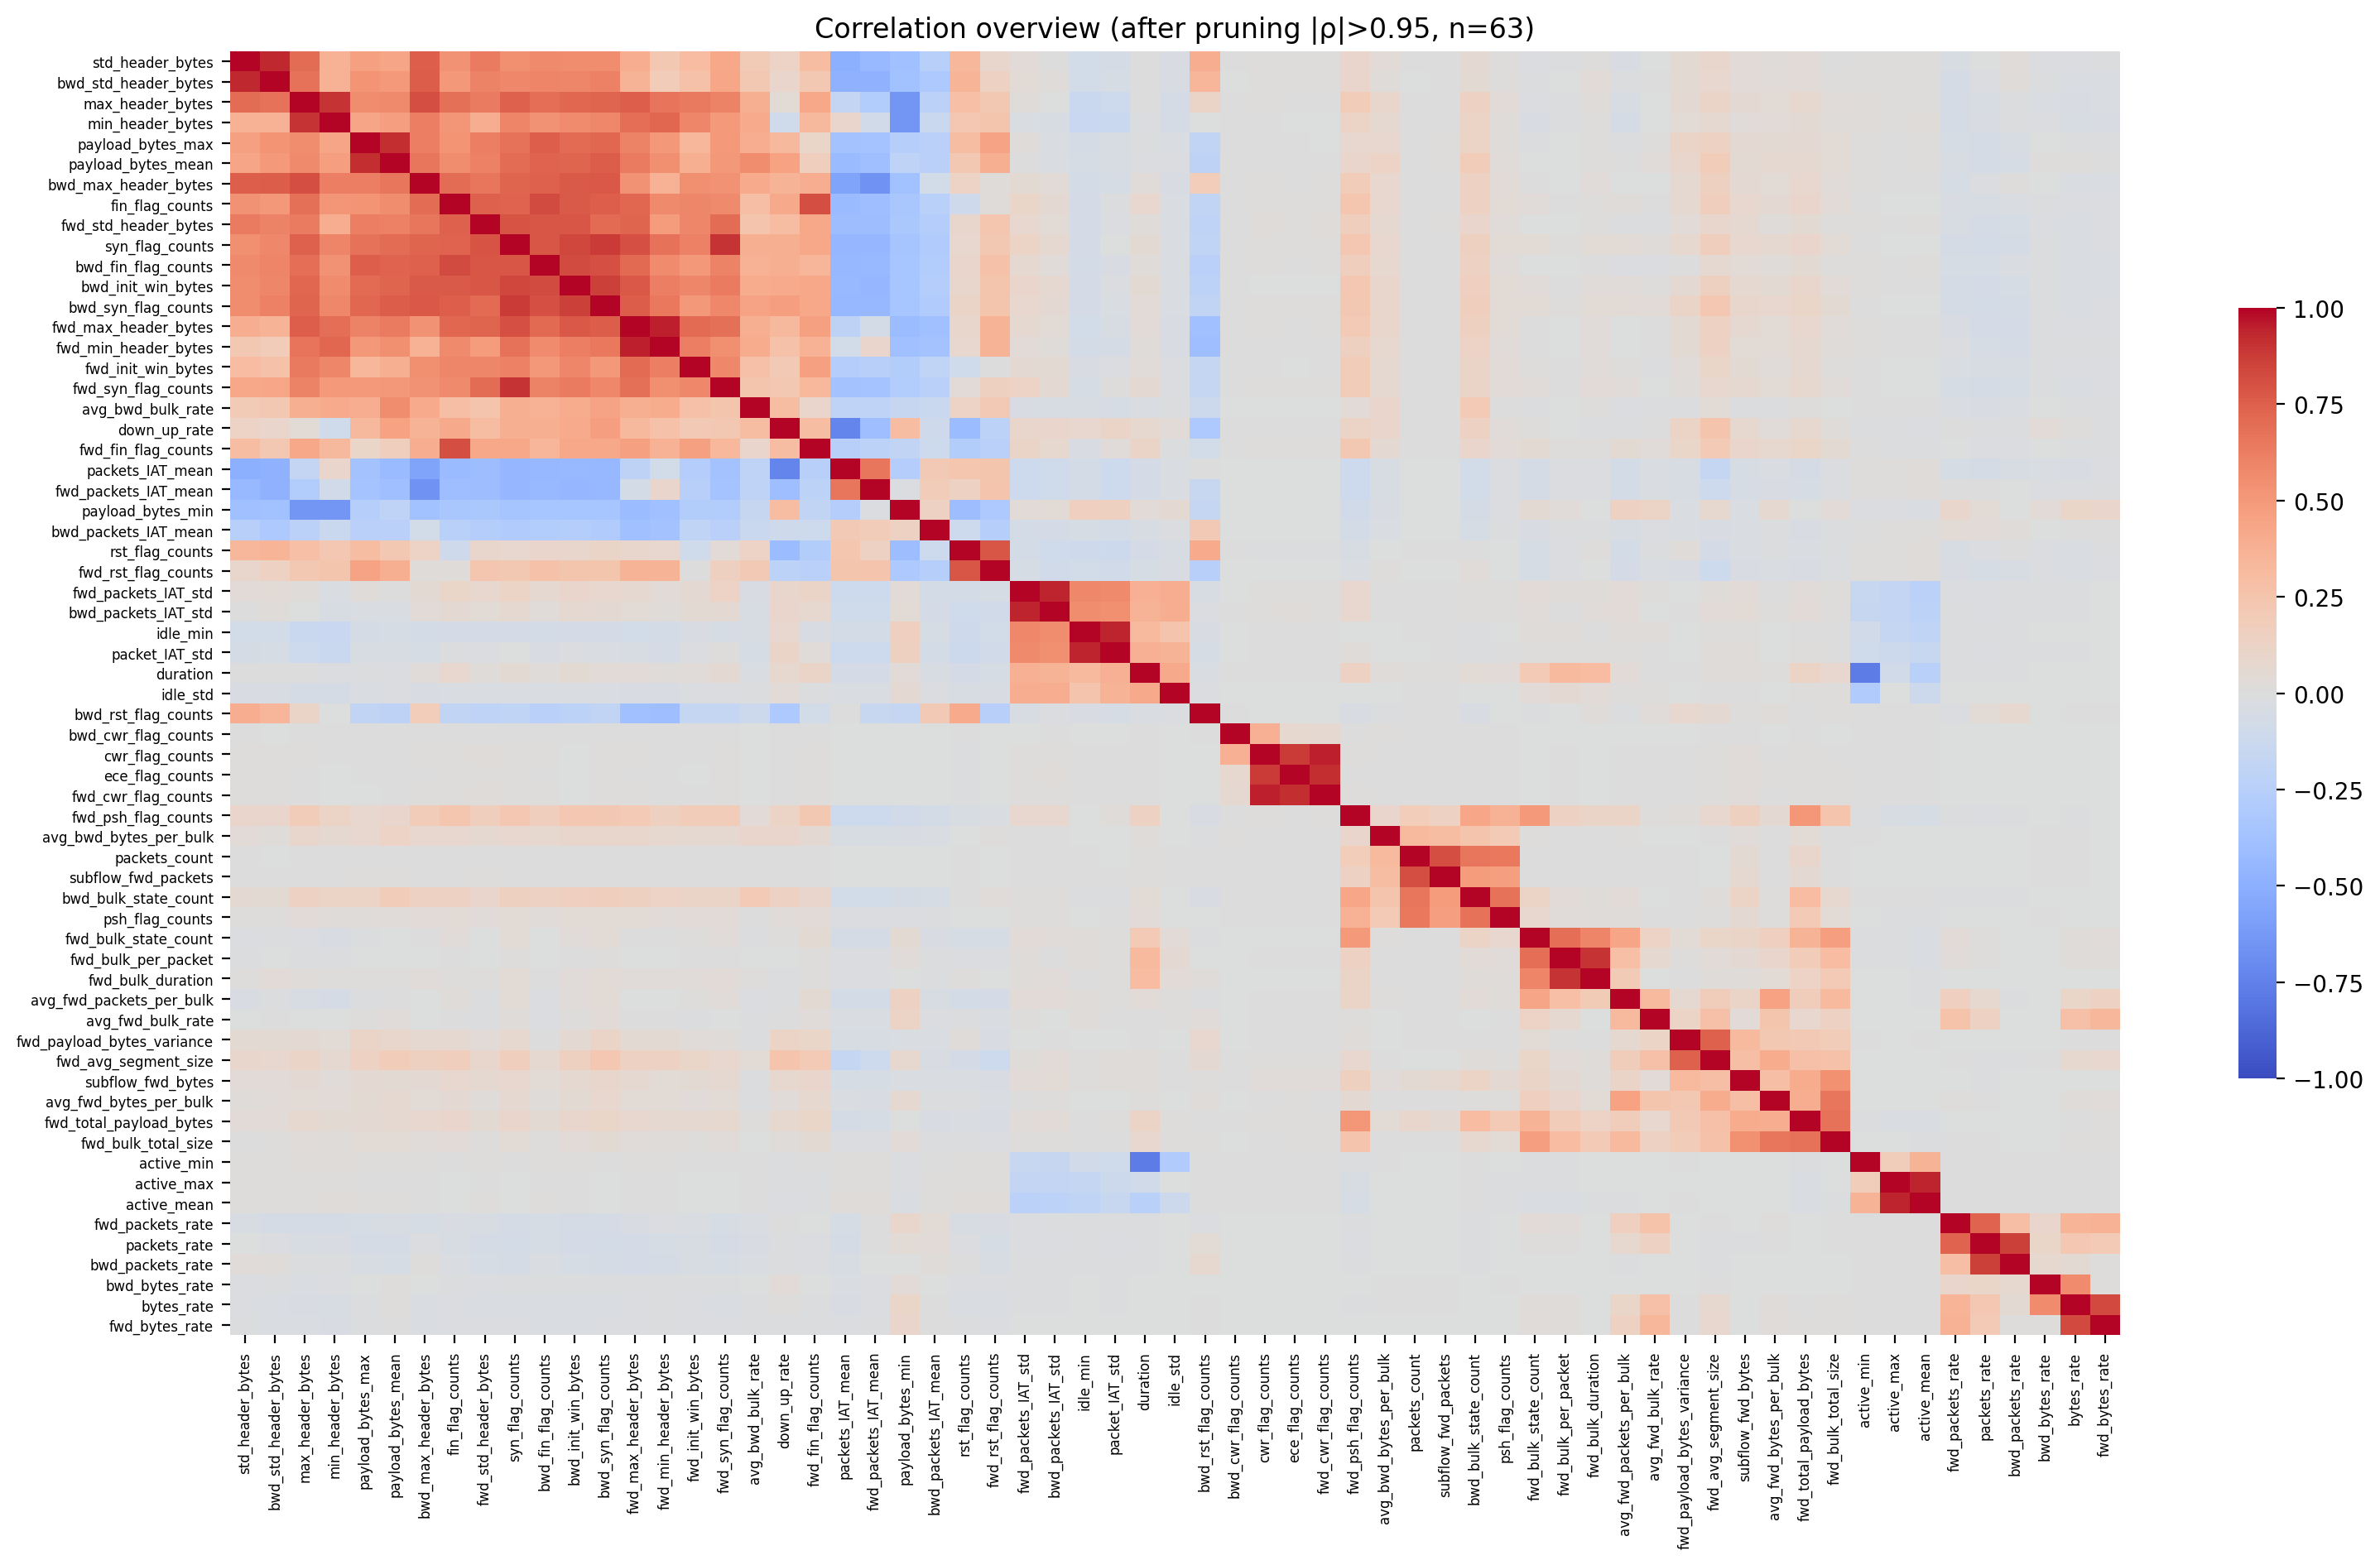

In [17]:
# 2) Plot full rectangular heatmap of the cleaned set
plot_rect_corr_heatmap(
    X_clean,
    method="pearson",
    title=f"Correlation overview (after pruning |ρ|>0.95, n={X_clean.shape[1]})",
    outfile="corr_heatmap_full_pruned.png",
    cluster=True,
    max_ticks=40
)

In [18]:
X_clean.shape[1]

63

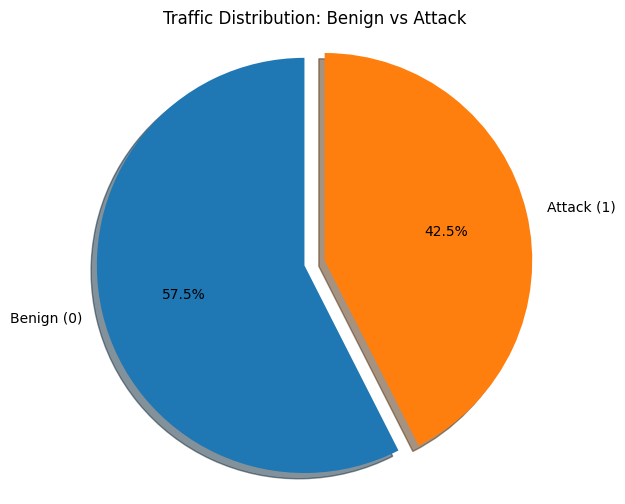

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def show_attack_distrib_y(y, title="Traffic Distribution: Benign vs Attack"):
    s = pd.Series(y)
    if s.dtype == object:
        s = s.map({"Benign": 0, "Attack": 1}).astype("int64")

    counts = s.value_counts().reindex([0, 1], fill_value=0)
    labels = ["Benign (0)", "Attack (1)"]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(
        counts.values,
        labels=labels,
        autopct="%1.1f%%",
        explode=[0, 0.1],
        shadow=True,
        startangle=90,
    )
    ax.axis("equal")
    ax.set_title(title)
    plt.show()

show_attack_distrib_y(y)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y
)

print("Train:", X_train.shape, "  Test:", X_test.shape)


Train: (875585, 63)   Test: (218897, 63)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


#Modeling


#Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    C=1.5,
    solver='lbfgs',
    n_jobs=-1,
    random_state=42
)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=1.5, class_weight='balanced', max_iter=2000, n_jobs=-1,
                   random_state=42)

In [23]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(y_test, logreg.predict(X_test_scaled))
print(f"Logistic Regression accuracy: {logreg_acc:.4f}")


Logistic Regression accuracy: 0.9408


#Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=30,
    min_samples_leaf=2,
    max_samples=0.8,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42,
    oob_score=True
)
rf.fit(X_train, y_train)
print("OOB-AUC:", rf.oob_score_)


OOB-AUC: 0.9998343964320997


In [25]:
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest accuracy: {rf_acc:.4f}")


Random Forest accuracy: 0.9998


#Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42, subsample=0.8)

In [27]:
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Gradient Boosting accuracy: {gb_acc:.4f}")


Gradient Boosting accuracy: 0.9986


#Artificial Neural Network (Keras)

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

input_dim = X_train_scaled.shape[1]

ann = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='binary_crossentropy',
            metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

ann_hist = ann.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1540/1540 - 11s - 7ms/step - accuracy: 0.9443 - loss: 0.1292 - val_accuracy: 0.9507 - val_loss: 0.1092
Epoch 2/50
1540/1540 - 4s - 3ms/step - accuracy: 0.9519 - loss: 0.1096 - val_accuracy: 0.9510 - val_loss: 0.1063
Epoch 3/50
1540/1540 - 5s - 3ms/step - accuracy: 0.9523 - loss: 0.1072 - val_accuracy: 0.9512 - val_loss: 0.1059
Epoch 4/50
1540/1540 - 4s - 2ms/step - accuracy: 0.9524 - loss: 0.1061 - val_accuracy: 0.9513 - val_loss: 0.1057
Epoch 5/50
1540/1540 - 5s - 3ms/step - accuracy: 0.9526 - loss: 0.1054 - val_accuracy: 0.9514 - val_loss: 0.1054
Epoch 6/50
1540/1540 - 5s - 3ms/step - accuracy: 0.9526 - loss: 0.1051 - val_accuracy: 0.9517 - val_loss: 0.1047
Epoch 7/50
1540/1540 - 4s - 2ms/step - accuracy: 0.9528 - loss: 0.1045 - val_accuracy: 0.9516 - val_loss: 0.1048
Epoch 8/50
1540/1540 - 5s - 3ms/step - accuracy: 0.9528 - loss: 0.1045 - val_accuracy: 0.9515 - val_loss: 0.1050
Epoch 9/50
1540/1540 - 5s - 3ms/step - accuracy: 0.9529 - loss: 0.1041 - val_accuracy: 0.9517 -

In [29]:
ann_loss, ann_acc = ann.evaluate(X_test_scaled, y_test, verbose=0)
print(f"ANN accuracy: {ann_acc:.4f}")


ANN accuracy: 0.9534


#Matrix

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score,
                             RocCurveDisplay)

def evaluate_model(model, name):

    use_scaled = name == "Logistic Regression"
    X_eval = X_test_scaled if use_scaled else X_test

    y_pred = model.predict(X_eval)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_eval)[:, 1]
    elif hasattr(model, "decision_function"):
        y_dec   = model.decision_function(X_eval)
        y_score = (y_dec - y_dec.min()) / (y_dec.max() - y_dec.min())  # 0-1 scale
    else:
        y_score = None

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred,
                                target_names=["Benign", "Attack"],
                                digits=4))

    cm = confusion_matrix(y_test, y_pred)
    if y_score is not None:
        print("ROC-AUC:", round(roc_auc_score(y_test, y_score), 4))
    else:
        print("ROC-AUC:   n/a (no probabilistic scores)")

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Confusion matrix heat-map
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred Benign', 'Pred Attack'],
                yticklabels=['True Benign', 'True Attack'],
                ax=ax[0])
    ax[0].set_title(f"{name} – Confusion Matrix")

    # ROC curve
    if y_score is not None:
        RocCurveDisplay.from_predictions(y_test, y_score, ax=ax[1])
        ax[1].set_title(f"{name} – ROC Curve")
    else:
        ax[1].axis('off')

    plt.tight_layout()
    plt.show()



=== Logistic Regression ===
              precision    recall  f1-score   support

      Benign     0.9941    0.9024    0.9460    125822
      Attack     0.8827    0.9928    0.9345     93075

    accuracy                         0.9408    218897
   macro avg     0.9384    0.9476    0.9403    218897
weighted avg     0.9467    0.9408    0.9411    218897

ROC-AUC: 0.9776


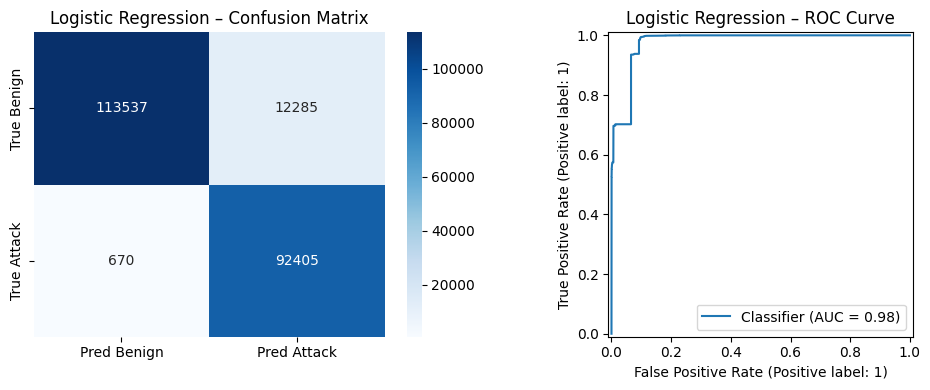


=== Random Forest ===
              precision    recall  f1-score   support

      Benign     0.9999    0.9998    0.9999    125822
      Attack     0.9997    0.9999    0.9998     93075

    accuracy                         0.9998    218897
   macro avg     0.9998    0.9998    0.9998    218897
weighted avg     0.9998    0.9998    0.9998    218897

ROC-AUC: 1.0


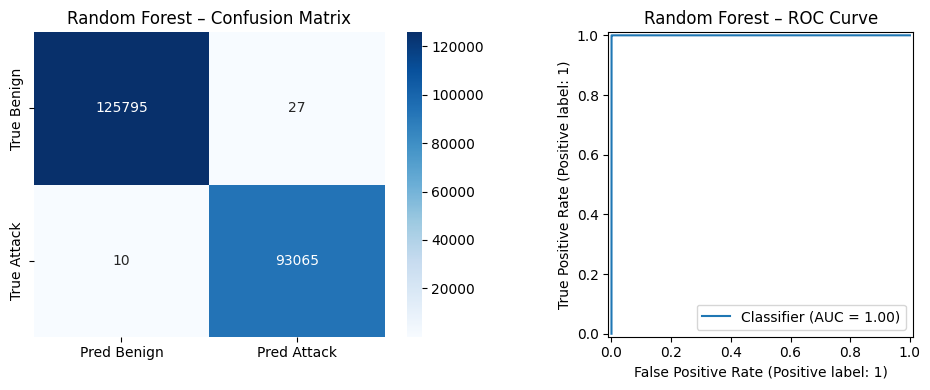


=== Gradient Boosting ===
              precision    recall  f1-score   support

      Benign     0.9983    0.9992    0.9988    125822
      Attack     0.9990    0.9978    0.9984     93075

    accuracy                         0.9986    218897
   macro avg     0.9987    0.9985    0.9986    218897
weighted avg     0.9986    0.9986    0.9986    218897

ROC-AUC: 1.0


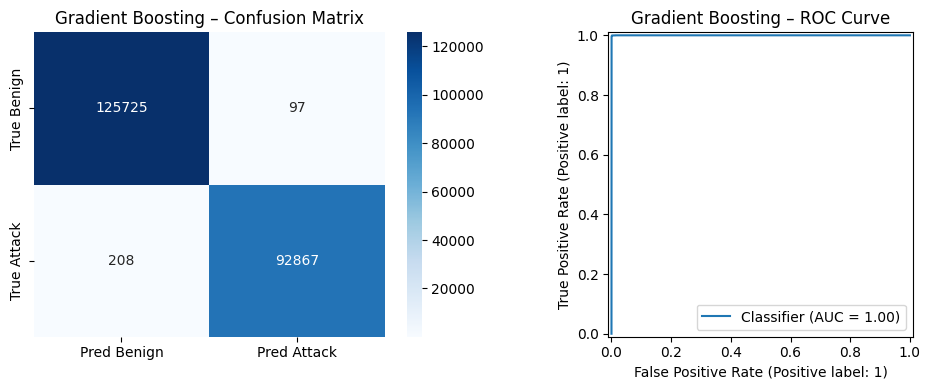

In [31]:
models = {
    "Logistic Regression": logreg,
    "Random Forest":       rf,
    "Gradient Boosting":   gb,
}

for name, mdl in models.items():
    evaluate_model(mdl, name)


In [32]:
ann_scores = ann.predict(X_test_scaled).ravel()
ann_pred   = (ann_scores >= 0.5).astype(int)


6841/6841 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


              precision    recall  f1-score   support

      Benign     0.9990    0.9199    0.9578    125822
      Attack     0.9022    0.9987    0.9480     93075

    accuracy                         0.9534    218897
   macro avg     0.9506    0.9593    0.9529    218897
weighted avg     0.9578    0.9534    0.9536    218897

Confusion matrix:
 [[115742  10080]
 [   117  92958]]
ROC-AUC: 0.9944


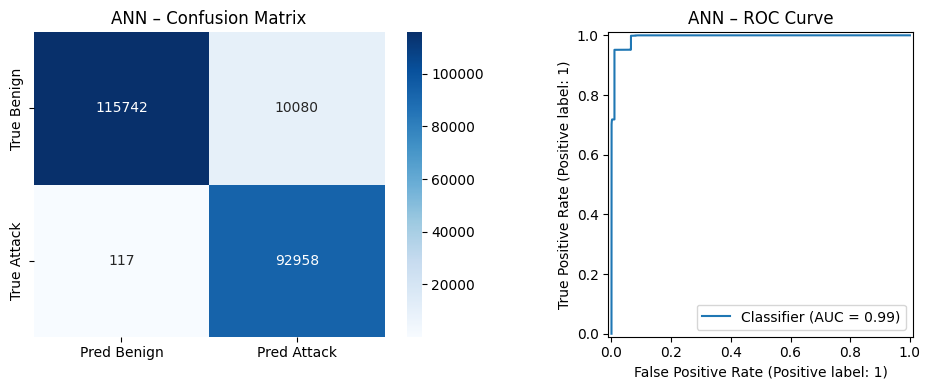

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, ann_pred,
                            target_names=['Benign', 'Attack'],
                            digits=4))
cm = confusion_matrix(y_test, ann_pred)
print("Confusion matrix:\n", cm)
print("ROC-AUC:", round(roc_auc_score(y_test, ann_scores), 4))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Confusion-matrix heat-map
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Benign', 'Pred Attack'],
            yticklabels=['True Benign', 'True Attack'],
            ax=ax[0])
ax[0].set_title("ANN – Confusion Matrix")

# ROC curve
RocCurveDisplay.from_predictions(y_test, ann_scores, ax=ax[1])
ax[1].set_title("ANN – ROC Curve")

plt.tight_layout()
plt.show()
